<a href="https://colab.research.google.com/github/Pedro4010/Clusterizacao/blob/main/Clusterizacaoo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização

 Uma ONG humanitária internacional está empenhada em combater a pobreza e fornecer às pessoas de países atrasados amenidades básicas e alívio durante desastres e calamidades naturais. De vez em quando, ela executa muitos projetos operacionais, juntamente com ações de advocacy para aumentar a conscientização, bem como para fins de financiamento.

Após os recentes programas de financiamento, eles conseguiram arrecadar cerca de US$ 10 milhões. Agora, o CEO da ONG precisa decidir como usar esse dinheiro de forma estratégica e eficaz. As questões significativas que surgem ao tomar essa decisão estão relacionadas principalmente à escolha dos países que mais precisam de ajuda.

E é aí que entramos como cientistas de dados. Nosso trabalho é categorizar os países usando alguns fatores socioeconômicos e de saúde que determinam o desenvolvimento geral do país. Em seguida, precisamos sugerir os países nos quais o CEO mais precisa se concentrar.


O dataset possui as seguintes colunas:
*   **country**: nome do país
*   **child_mort**: taxa de mortalidade infantil
*   **exports**:taxa de exportação de bens e serviços
*   **health**: total gasto com saúde
*   **imports**: importação de bens e serviços
*   **Income**:  renda per capita
*   **Inflation**: indice de inflação
*   **life_expec**: expectativa de vida
*   **total_fer**: taxa de fecundidade (estimativa da quantidade de filhos que uma mulher teria ao longo de sua vida reprodutiva)
*   **gdpp**: produção economica de um país (PIB)






In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/googlecolab/country.csv')

Mounted at /content/drive


### Primeiras análises 

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# Verificando quais são os 10 países com maior renda per capita.
df.sort_values(by='gdpp', ascending=False).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [ ]:
# Conferindo se há valores nulos.
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# Verificando o tipo de cada coluna
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
# O que é legal ver no describe: 
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


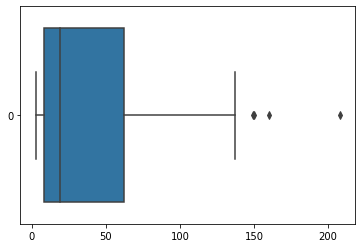

In [ ]:
# Verificando se há outliers na coluna 'child_mort', pois a mediana é menor que a média, o que pode indicar a presença de outliers.
sns.boxplot(data=df['child_mort'], orient='h')
plt.show()

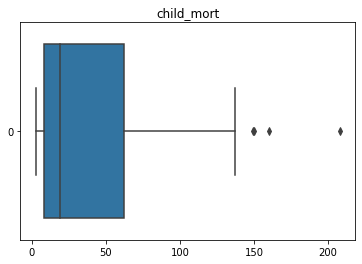

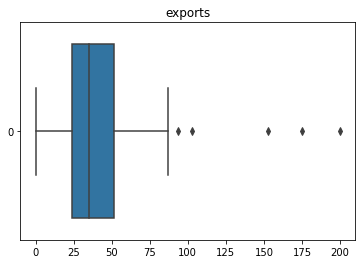

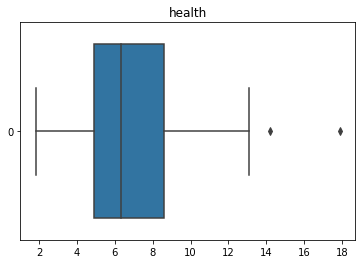

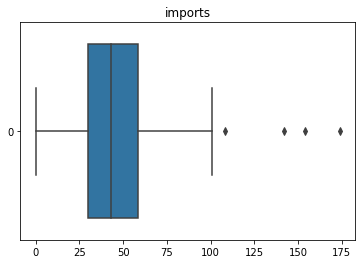

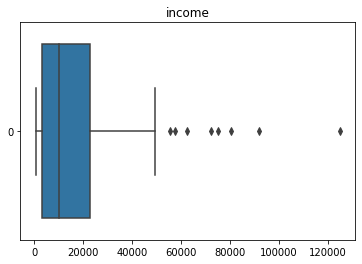

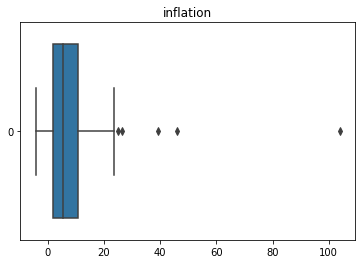

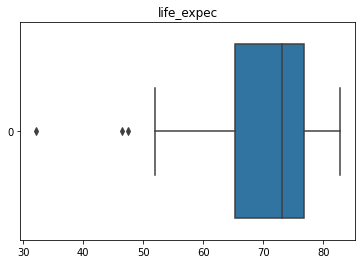

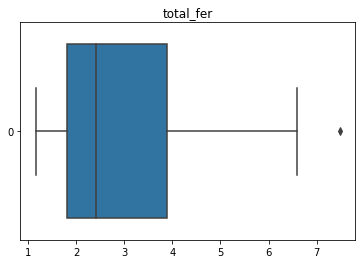

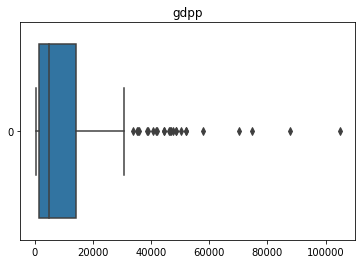

In [ ]:
# Plotando um boxplot para cada coluna, entender os outliers.
for col in df.columns[1:]:
  sns.boxplot(data=df[col], orient='h')
  plt.title(col)
  plt.show()

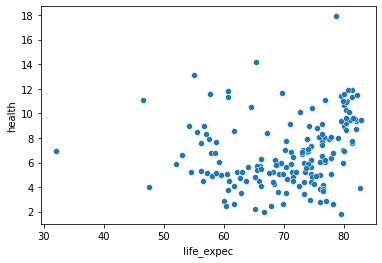

In [ ]:
# Fazendo um scatterplot com duas variáveis diretamente ligadas.
# Tentar ver se há alguma correlação entre essas variáveis
sns.scatterplot(x='life_expec',y='health', data=df)
plt.show()

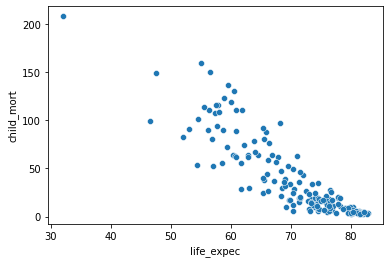

In [ ]:
sns.scatterplot(x='life_expec',y='child_mort', data=df)
plt.show()

### Fim das primeiras análises

### Clusterização

In [ ]:
# Primeira coisa: padronizar os dados

from sklearn.preprocessing import StandardScaler

In [ ]:
countries = df.iloc[:, 1:]

In [ ]:
countries

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
scaler = StandardScaler()

In [ ]:
countries_scaled = scaler.fit_transform(countries)

In [ ]:
countries_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [ ]:
countries_scaled = pd.DataFrame(countries_scaled, columns = countries.columns)

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Função do método do cotovelo. Vai ser sempre a mesma!!
# É bom para começo de trabalho..
def elbow(values):
  wcss = []
  for i in range(2,12):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)
  plt.plot(range(2,12), wcss)
  plt.title('Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('WCSS')
  plt.show()

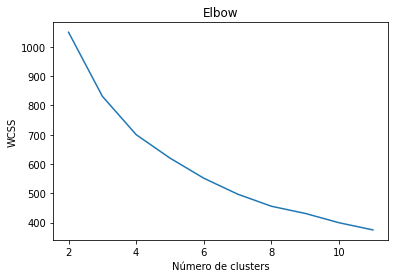

In [ ]:
elbow(countries_scaled)

### Yellowbricks
Ferramenta que também usa o ScikitLearn. Mistura de ScikitLearn com Matplolib.
Outras métricas para avaliar o melhor K.

##### Elbow

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
def elbow_yellow(values):
  kmeans = KMeans() # O yellowbrick já faz o laço automaticamente, por isso não precisa do n_clusters. 
  visualizer = KElbowVisualizer(kmeans, k=(2,12))
  visualizer.fit(values)
  visualizer.show()

# Essa biblioteca mistura conceitos do Scikit com o MatPlot. Ela fita o modelo e exibe com uma boa visualização, de maneira simples e eficaz. 
# A linha verde tracejada mostra a velocidade de processamento. Se usarmos um valor diferente de clusters, o modelo irá demorar mais a rodar.

In [ ]:
# Mesmo método de gerar o código, vamos apenas trocar a métrica, ao em vez do erro, vamos usar o método de calinsk_harabasz, ou método da silhueta.
def elbow_ch(values):
  kmeans = KMeans() 
  visualizer = KElbowVisualizer(kmeans, k=(2,12), metric='calinski_harabasz')
  visualizer.fit(values)
  visualizer.show()

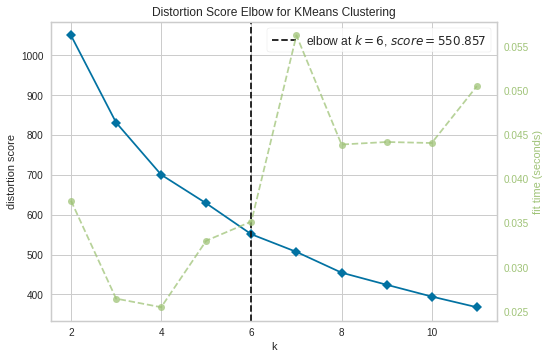

In [ ]:
elbow_yellow(countries_scaled)

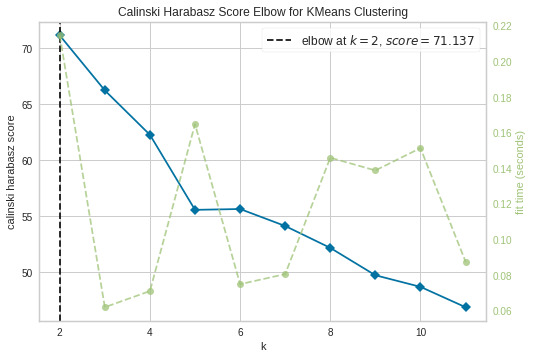

In [ ]:
elbow_ch(countries_scaled)

##### Silhoueta ->  No método da silhueta, estamos medindo o quão próximo um valor está do seu cluster e o quão longe ele está dos demais. Quanto mais perto do seu cluster, melhor, pois sabemos que aquele valor realmente pertence à aquele cluster. Depois, você pega todos os dados do seu conjunto e ordena por esse índice. Quanto maior o índice melhor. Utilizar uma quantidade de clusters onde todos pelo menos passaram da média. 

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
def sillhouette(values, k):
  kmeans = KMeans(k) 
  visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
  visualizer.fit(countries_scaled)
  visualizer.show()

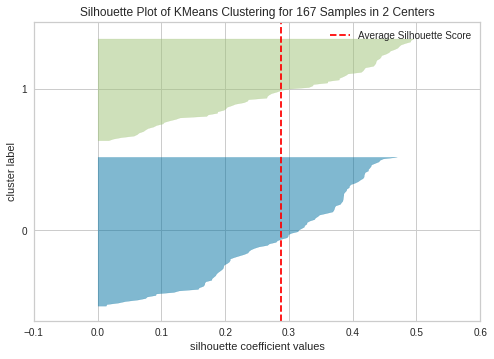

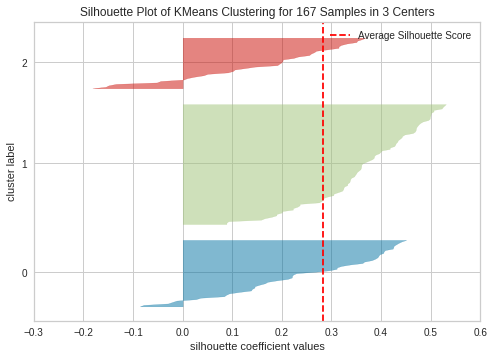

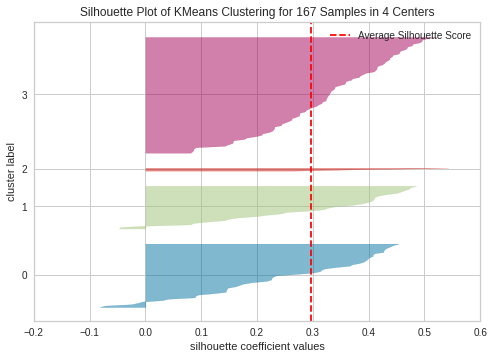

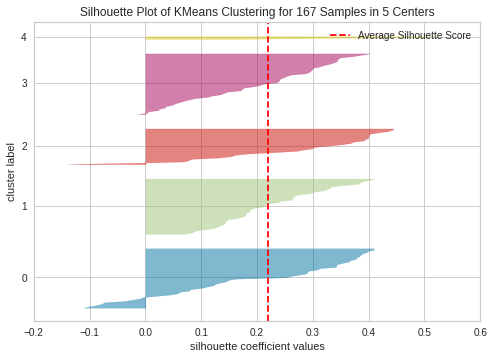

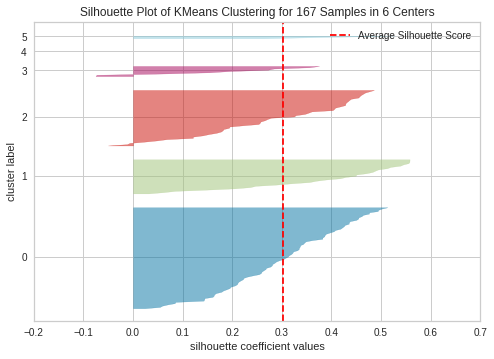

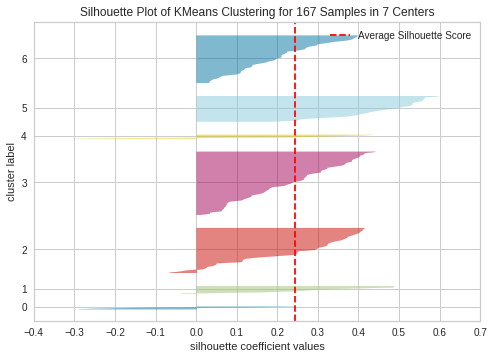

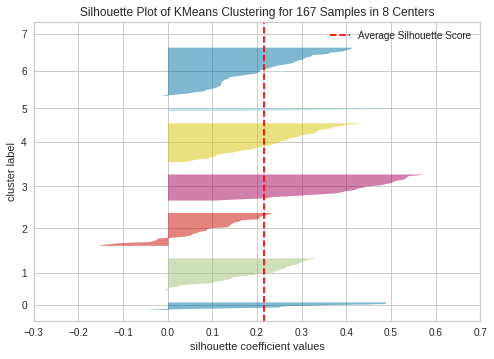

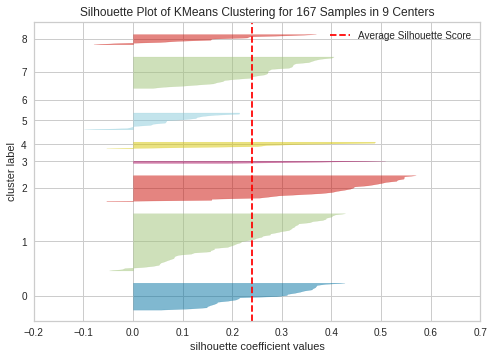

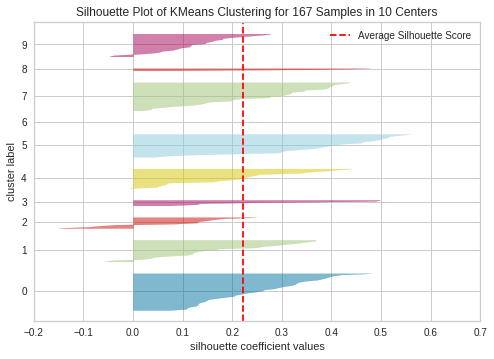

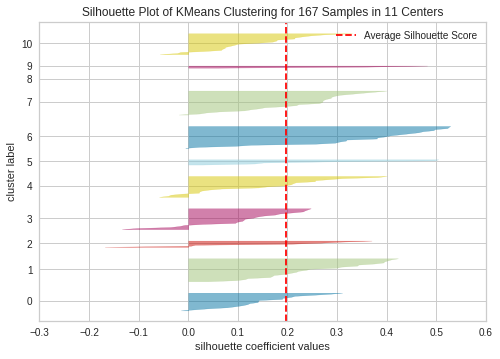

In [ ]:
for i in range(2,12):
  sillhouette(countries_scaled, i)

##### Alguns problemas vão ser encontrados pela quantidade de variáveis que o DataFrame possui. Nesse caso são 9, e não há como criar uma visualização '9d'.
##### Isso atrapalha a clusterização e a visualização. 
##### Tentamos reduzir a dimensionalidade, através do PCA por exemplo.

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
from yellowbrick.features import PCA

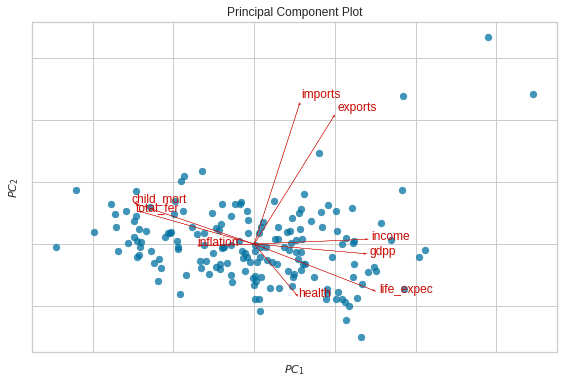

In [ ]:
# Reduzimos a dimensionalidade para PC1 e PC2.
# Significa que com essas duas componentes ele consegue nos dizer qualquer ponto de dados, não precisamos mais dos 9. 
visualizer = PCA(proj_features=True)
visualizer.fit_transform(countries_scaled)
visualizer.show()

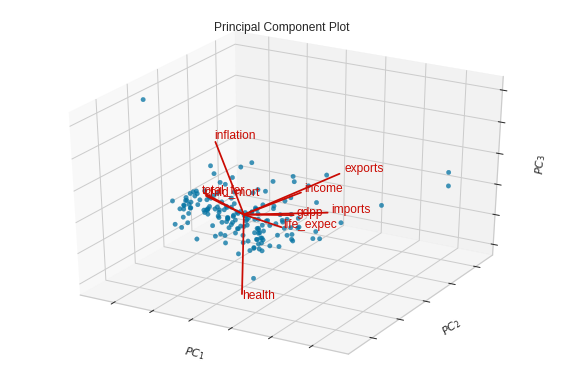

In [ ]:
visualizer = PCA(proj_features=True, projection = 3)
visualizer.fit_transform(countries_scaled)
visualizer.show()

In [ ]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA()
pca.fit(countries_scaled)
features = range(pca.n_components_)

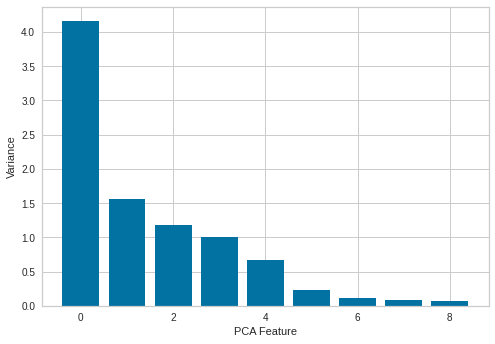

In [97]:
# Quanto maior a Variance, mais o meu número de componentes consegue explicar a variação dos dados.
# Quando a diferença ficar muito grande, é porque está overfitando.
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

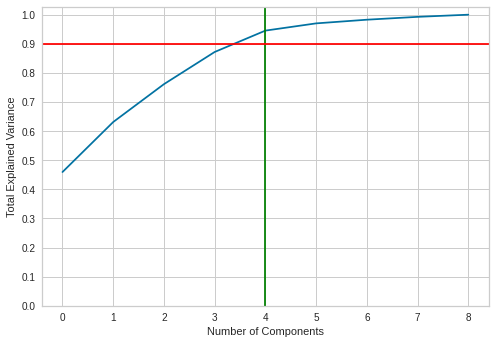

In [99]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Total Explained Variance')
plt.yticks(np.arange(0,1.1,0.1))
plt.axvline(4,c='green')
plt.axhline(0.9, c='red')
plt.show()

In [ ]:
pca = PCA(n_components=3)
countries_pca = pca.fit_transform(countries_scaled)

In [ ]:
countries_pca

array([[-2.91302459e+00,  9.56205755e-02, -7.18118495e-01],
       [ 4.29911330e-01, -5.88155666e-01, -3.33485505e-01],
       [-2.85225077e-01, -4.55174413e-01,  1.22150481e+00],
       [-2.93242265e+00,  1.69555507e+00,  1.52504374e+00],
       [ 1.03357587e+00,  1.36658709e-01, -2.25720917e-01],
       [ 2.24072616e-02, -1.77918658e+00,  8.69997116e-01],
       [-1.01583737e-01, -5.68251724e-01,  2.42091816e-01],
       [ 2.34216461e+00, -1.98845915e+00,  1.90344188e-01],
       [ 2.97376366e+00, -7.34688659e-01, -5.19766356e-01],
       [-1.81486997e-01, -4.02865873e-01,  8.67458743e-01],
       [ 1.26874386e+00, -6.56588363e-01, -4.88097616e-01],
       [ 1.67099640e+00,  5.61162493e-01,  9.91258303e-01],
       [-1.12385093e+00, -9.61397405e-01,  5.26614801e-01],
       [ 1.08137420e+00, -4.81969530e-01, -6.64355198e-01],
       [ 5.80025152e-01,  5.35326834e-01,  4.86227511e-01],
       [ 3.14378596e+00,  6.63547921e-01, -6.45228094e-01],
       [ 2.11255447e-01,  6.99242662e-01

In [ ]:
countries_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [ ]:
df_countries_pca = pd.DataFrame(countries_pca, columns=(['PC0','PC1','PC2']))
df_countries_pca

,PC0,PC1,PC2
0,-2.913025,0.095621,-0.718118
1,0.429911,-0.588156,-0.333486
2,-0.285225,-0.455174,1.221505
3,-2.932423,1.695555,1.525044
4,1.033576,0.136659,-0.225721
...,...,...,...
162,-0.820631,0.639570,-0.389923
163,-0.551036,-1.233886,3.101350
164,0.498524,1.390744,-0.238526
165,-1.887451,-0.109453,1.109752


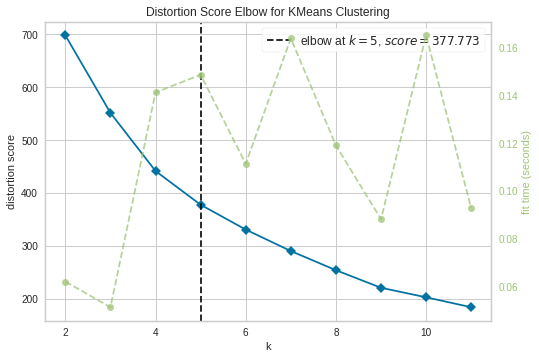

In [ ]:
elbow_yellow(countries_pca)

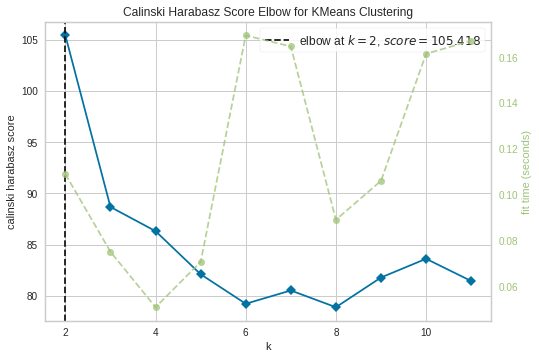

In [ ]:
elbow_ch(countries_pca)

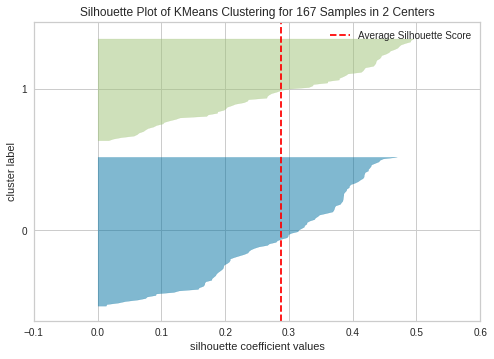

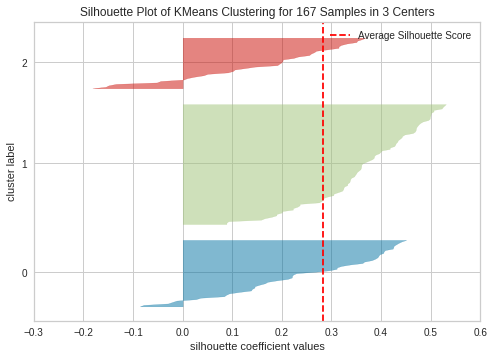

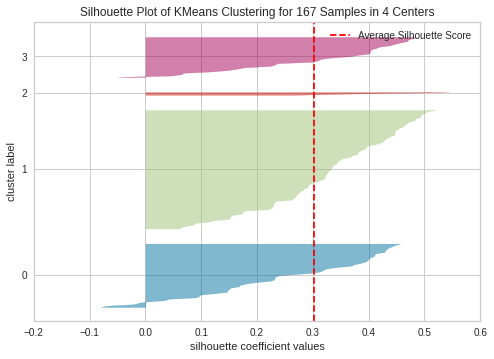

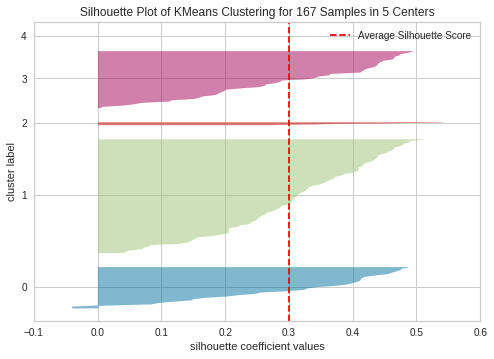

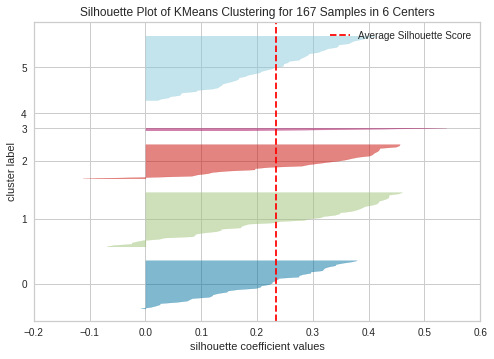

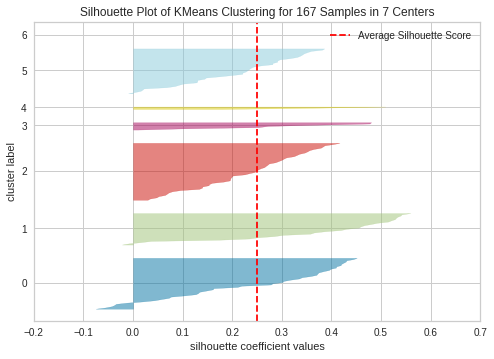

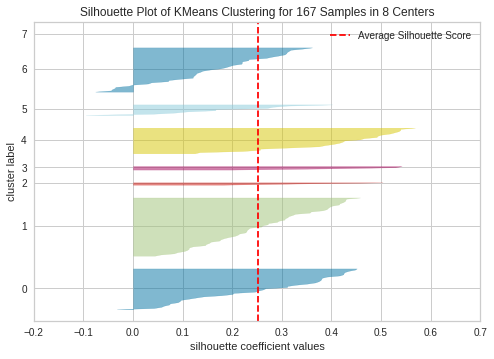

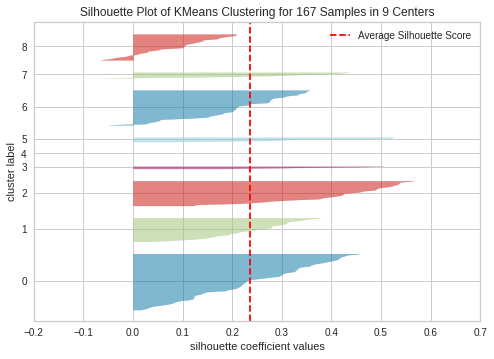

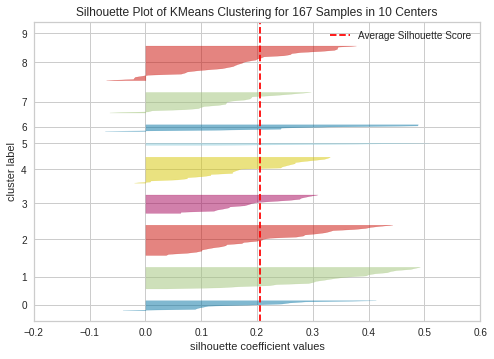

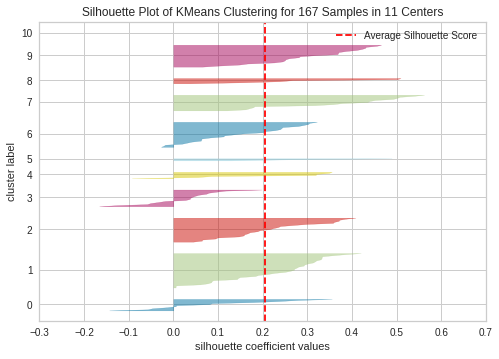

In [ ]:
for i in range(2,12):
  sillhouette(countries_pca, i)

In [ ]:
kmeans = KMeans(n_clusters=3)
yKMeans = kmeans.fit_predict(countries_pca)

In [ ]:
yKMeans

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

In [ ]:
# No dataset original que tiramos os insights. Os tratamentos são apenas para gerar os clusters.

df['Cluster'] = yKMeans

In [ ]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


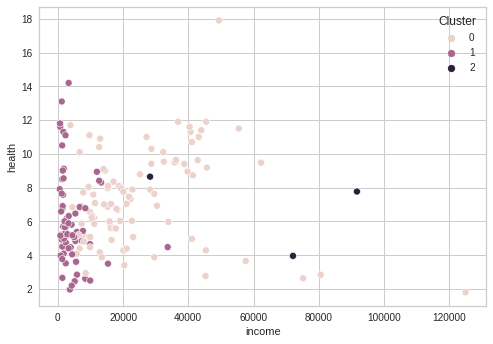

In [ ]:
sns.scatterplot(x='income',y='health',data=df, hue='Cluster')
plt.show()

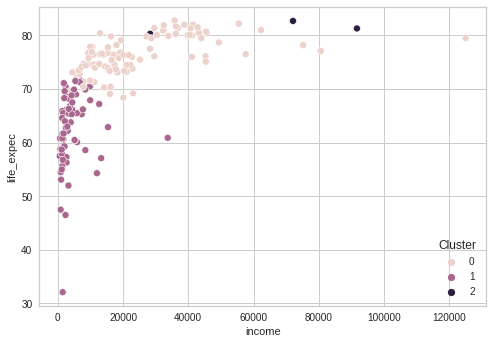

In [ ]:
sns.scatterplot(x='income',y='life_expec',data=df, hue='Cluster')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
yKMeans = kmeans.fit_predict(countries_pca)

In [ ]:
df['Cluster'] = yKMeans

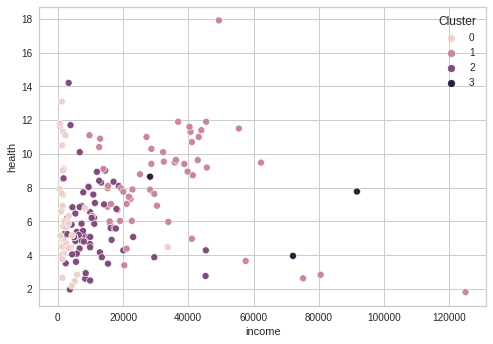

In [ ]:
sns.scatterplot(x='income',y='health',data=df, hue='Cluster')
plt.show()

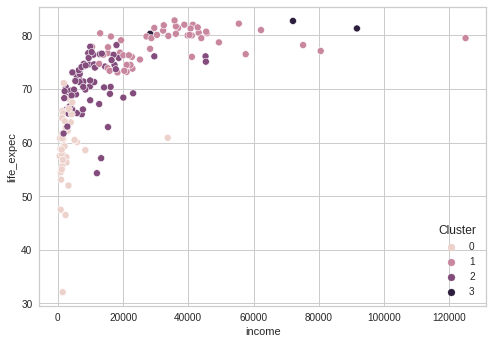

In [ ]:
sns.scatterplot(x='income',y='life_expec',data=df, hue='Cluster')
plt.show()

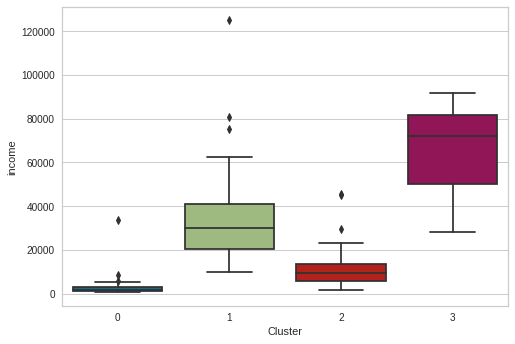

In [ ]:
# Com o boxplot podemos olhar para a renda e ver que de fato o Cluster 0 é o de menor renda.
sns.boxplot(x='Cluster',y='income',data=df)
plt.show()

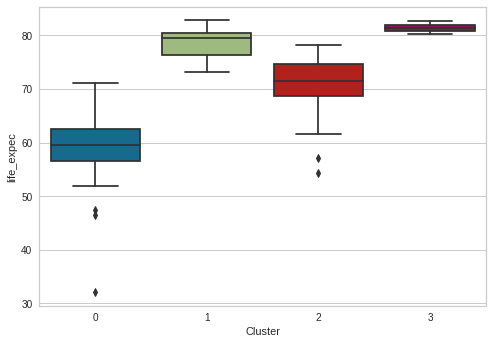

In [ ]:
# Olhando para a expectativa de vida, podemos encontrar os países com baixíssima expectativa de vida.
# Responde a uma pergunta do negócio, pois podemos nos concentrar nesses países.
sns.boxplot(x='Cluster',y='life_expec',data=df)
plt.show()

In [ ]:
df[df['Cluster']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0


###### Focando no problema do negócio.
###### Se quisermos reduzir ainda mais o número de países, para chegar naqueles que mais precisam de ajuda, podemos aumentar o número de clusters e ver quais serão cortados. Lembrando que todas as colunas terão algum tipo de interferência, o que torna o modelo mais preciso, consequentemente pode-se ajudar quem mais precisa, e não apenas supondo que tal argumento é melhor ou pior que o outro !

In [ ]:
# Geralmente quando temos dois clusters, provavelmente temos algum atributo binário (ex: masculino e feminino, 1 ou 0)

In [100]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

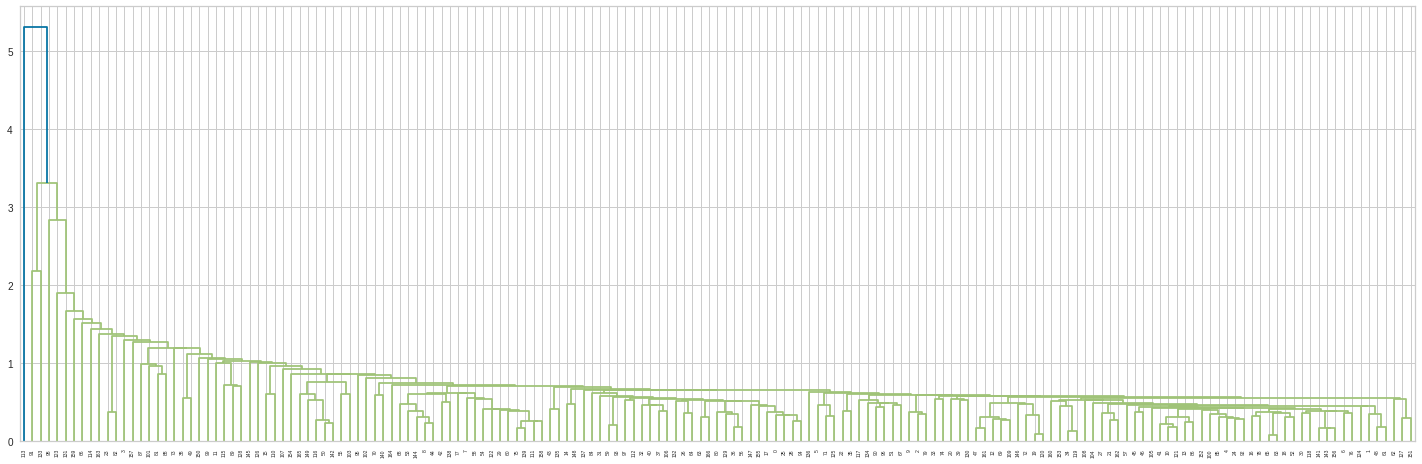

In [103]:
# Nesse método, os dados se aproximam de quem está perto. single
plt.figure(figsize=(25,8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='single'))
plt.show()

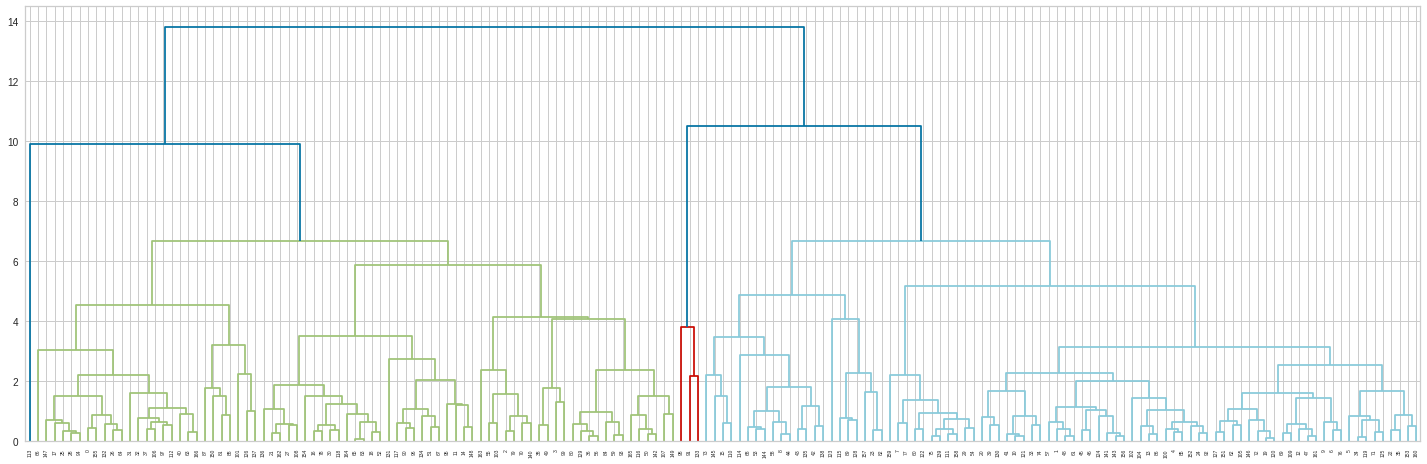

In [105]:
# Nesse método, os dados se distanciam de quem está longe. complete
plt.figure(figsize=(25,8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='complete'))
plt.show()

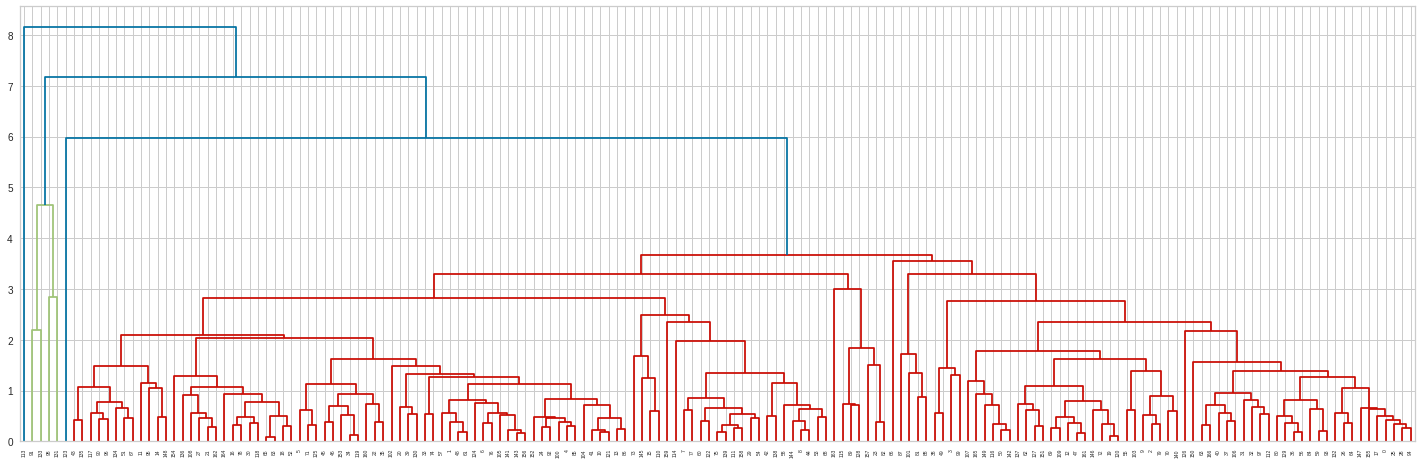

In [107]:
# Nesse método, tira-se uma média das proximidades. average
plt.figure(figsize=(25,8))
dend = sch.dendrogram(sch.linkage(countries_pca, method='average'))
plt.show()